In [ ]:
import pandas as pd

In [ ]:
data_set = pd.read_csv('/content/D2D_myfile1multi.csv')

In [ ]:
data_set.head()

,T_1,T_2,D,d,mbc1,mbc2,mtr1,mtr2,mtc1,mtc2,mbr1,mbr2,Output Alpha,Output Power1,Output Power2
0,0.87031,0.79774,0.56349,0.187010,4,1,2,3,5,5,1,5,0.66260,0.100000,1.00000
1,0.70150,0.31756,0.58067,0.182960,5,4,2,3,4,2,1,2,0.76016,0.100000,1.00000
2,0.41306,0.10463,0.68317,0.114490,3,1,2,2,5,4,2,2,0.82574,0.026296,0.26296
3,0.61549,0.11504,0.66143,0.099048,3,3,4,3,5,3,4,1,0.87410,0.038920,0.38920
4,0.67304,0.33087,0.57214,0.177930,5,1,5,2,5,3,5,4,0.74362,0.100000,1.00000


In [ ]:
pip install neupy

In [ ]:
X = data_set.drop(['Output Alpha', 'Output Power1'],axis=1)
y = data_set[['Output Alpha','Output Power1']]
X.shape, y.shape

((100030, 13), (100030, 2))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [ ]:
X_train.shape, y_train.shape

((80024, 13), (80024, 2))

In [ ]:
X_train_new = X_train.iloc[:10000]

y_train_new = y_train.iloc[:10000]
X_train_new.shape, y_train_new.shape

((10000, 13), (10000, 2))

In [ ]:
X_test_new = X_test.iloc[:2000]
y_test_new = y_test.iloc[:2000]
X_test_new.shape, y_test_new.shape

((2000, 13), (2000, 2))

In [ ]:
from neupy.layers import *

n_inputs = 13

n_outputs = 2

network = join(
  
    Input(n_inputs),


    Sigmoid(10),


    Relu(n_outputs),
)

In [ ]:
from neupy import algorithms

optimizer = algorithms.LevenbergMarquardt(
  
    network,


    verbose=True,

    show_epoch=2,
    mu = 0.001
)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.001
[OPTION] mu_update_factor = 1.2
[OPTION] show_epoch = 2
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/relu-5:0", shape=(?, 2), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.45 seconds


In [ ]:
optimizer.train(X_train_new, y_train_new, X_test_new, y_test_new, epochs=10)

#1 : [21 sec] train: 0.188149, valid: 0.053111


#2 : [21 sec] train: 0.053616, valid: 0.012838


#4 : [22 sec] train: 0.004328, valid: 0.003149


#6 : [23 sec] train: 0.000846, valid: 0.000316


#8 : [23 sec] train: 0.000245, valid: 0.000188


#10 : [23 sec] train: 0.000187, valid: 0.000150


Score with 10000 Rows of training_data and 2000 Rows of test_ data

In [ ]:
optimizer.score(X_test_new, y_test_new)

0.00014992559

In [ ]:
y_predict_new = optimizer.predict(X_test_new)
y_predict_new

array([[0.7959372 , 0.03613004],
       [0.8277389 , 0.066926  ],
       [0.65903425, 0.065184  ],
       ...,
       [0.6813483 , 0.03755844],
       [0.745579  , 0.02575383],
       [0.73043466, 0.0709666 ]], dtype=float32)

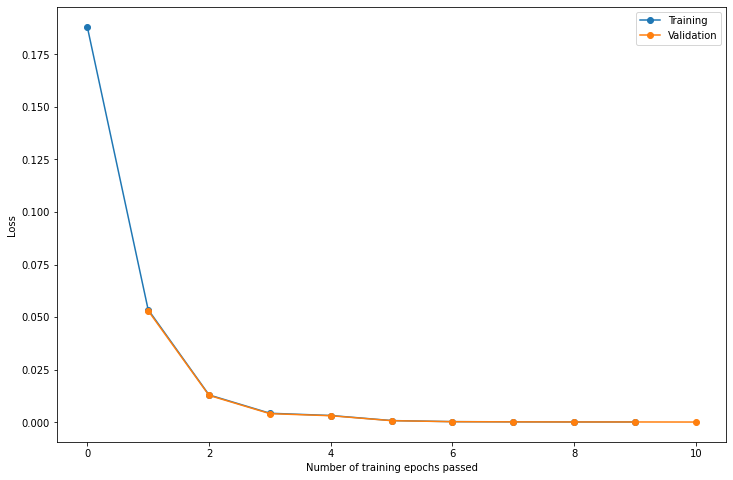

In [ ]:
optimizer.plot_errors()

Training with 30000 Rows of dataset

In [ ]:
X_train_new3 = X_train.iloc[:30000]

y_train_new3 = y_train.iloc[:30000]
X_train_new3.shape, y_train_new3.shape

((30000, 13), (30000, 2))

In [ ]:
X_test_new3 = X_test.iloc[:6000]
y_test_new3 = y_test.iloc[:6000]
X_test_new3.shape, y_test_new3.shape

((6000, 13), (6000, 2))

In [ ]:
from neupy.layers import *


n_inputs = 13


n_outputs = 2

network3 = join(

    Input(n_inputs),

    Sigmoid(10),

    Relu(n_outputs),
)

In [ ]:
from neupy import algorithms

optimizer3 = algorithms.LevenbergMarquardt(

    network3,

    verbose=True,


    show_epoch=2,
    mu = 0.001
)


Main information

[ALGORITHM] LevenbergMarquardt

[OPTION] loss = mse
[OPTION] mu = 0.001
[OPTION] mu_update_factor = 1.2
[OPTION] show_epoch = 2
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] target = Tensor("placeholder/target/relu-7:0", shape=(?, 2), dtype=float32)
[OPTION] verbose = True

[TENSORFLOW] Initializing Tensorflow variables and functions.
[TENSORFLOW] Initialization finished successfully. It took 0.94 seconds


In [ ]:
optimizer3.train(X_train_new3, y_train_new3, X_test_new3, y_test_new3, epochs=10)

#1 : [03:05] train: 0.121849, valid: 0.031832


#2 : [03:00] train: 0.031813, valid: 0.008283


#4 : [02:58] train: 0.002875, valid: 0.001360


#6 : [02:50] train: 0.001369, valid: 0.000655


#8 : [02:51] train: 0.000413, valid: 0.000214


#10 : [02:52] train: 0.000311, valid: 0.000150


In [ ]:
optimizer3.score(X_test_new3, y_test_new3)

0.00014992416